## 1.1 Contents<a id='1.1_Contents'></a>
* [1 Data Introduction](#1_Data_intorduction)
  * [1.1 Objectives](#1.4_Objectives)
    * [1.1.1 Key Questions](#1.3_Imports)
  * [1.2 Product Dataset](#1.1_Product_Information)
 * [1.7 Summary](#1.7_Summary)

# 1. Data Introduction<a id='1_Data_Introduction'></a>

Sunlight Ski and Bike, a small store in Glenwood Springs, relies on sales representatives' suggestions for seasonal orders, leading to inefficient inventory management and buying due to:
* Lack of understanding of product inventory and demand.
* Unclear product categories: prioritizing or eliminating categories.
* Difficulty identifying high-demand, high-value items.
* Missed opportunities for cross-selling.

This results in:
* Stockouts for in-demand products.
* Overstocking on slow-moving items.
* Lost revenue and customer satisfaction.

## Objectives<a id='1.1_Objectives'></a>

After exploring the historic sales and product data, it was decided that the "category" of the products needed some cleaning up in order to get better reporting on which items sell the best, which prices, etc. Therefore in order to gain an understanding of how to <b>optimize product inventory and sales to maximize profitability and customer satisfaction</b>, the categories (like skis, bikes, bike parts, etc) need to be reviewed and fixed. Once, the categories and parent categories are correctly classified then we can look at questions like:
Specific questions:
* Which products sell the best and the quickest?
* Which brand sells the most with no discounts, or full MSRP price?

And further doesn the road, we can look at:
* What factors influence sales patterns (e.g., seasonality, promotions, external events)?
* Can we accurately predict future demand for specific products or categories?
* How can we personalize product recommendations to individual customers?

In [ ]:
#import libraries
import os
import warnings
warnings.filterwarnings("ignore")
# import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  

## 1. 1 Product Datasets<a id='#1.1_Product_Information'></a>

Let's look at the products dataset and explore/clean up the category information to get a better understanding of the types of products.

A little information about this dataset--

**Identifiers and Codes:**

ID (object): A unique identifier for each product, usually a numerical or alphanumeric code.

SKU (Stock Keeping Unit, object): A unique code used for inventory tracking and identification.

UPC (Universal Product Code, object): A barcode used for scanning and tracking products globally.

MPN (Manufacturer Part Number, object): A unique code assigned by the manufacturer to identify a specific product.

VPN (Vendor Part Number, object): A code assigned by the vendor to identify a product within their catalog.

**Product Information:**

Category (object): The category or subcategory where the product belongs.

Description (object): A detailed description of the product's features and specifications.

Keyword (object): Keywords or tags associated with the product, used for search and filtering.

EstimatedCost (float64): The estimated cost of the product to the retailer.

MSRP (Manufacturer's Suggested Retail Price, float64): The suggested retail price set by the manufacturer.

**Inventory Management:**

Quantity (int64): The current quantity of the product in stock.

Min (int64): The minimum quantity to keep in stock.

Min2 (int64): A secondary minimum quantity threshold.

Max (int64): The maximum quantity to hold in stock.

Max2 (int64): A secondary maximum quantity threshold.

IsNonInventory (bool): Indicates whether the product is a non-inventory item (not physically stocked).

**Product Attributes:**

Brand (object): The brand or manufacturer of the product.

Color (object): The color of the product.

Size (object): The size of the product, if applicable.

Location (object): The physical location where the product is stored (likely has limited use with only 2 non-null values).

Other (object): Any other relevant product attributes.

StyleNumber (object): A style number assigned by the manufacturer or vendor.

StyleName (object): A descriptive name for the product's style.

Year (object): The year the product was released or manufactured.

Gender (object): The target gender for the product.

Season (object): The season for which the product is intended (e.g., spring, summer).

**Sales and Pricing:**

Commission (float64): The commission rate earned on the sale of the product.

IsDollarCommission (bool): Indicates whether the commission is a fixed dollar amount or a percentage.

NoLabel (bool): Indicates whether the product is sold without a label.

EstimatedTime (int64): The estimated time it takes to process and ship the product.

eCommerce (bool): Indicates whether the product is available for sale online.

In [ ]:
# Load datasets
product_excel = "../data/raw/In-Store_Products_202401021512.xlsx" 

# Read the Excel file into a DataFrame
products = pd.read_excel(product_excel)

# Optionally, view the first few rows of the DataFrame
products.info()

In [ ]:
# products.dropna(subset=['Category'])
products['Category'] = products['Category'].astype(str)
products['ParentCategory'] = products['Category'].apply(lambda x: x.split('-')[0])

In [ ]:
# products = products.set_axis(['Category', *products.columns[1:]], axis=1, inplace=False)
products = products.reset_index(drop=True)
parent_categories = products.iloc[:, 31].tolist()
print(len(parent_categories))

In [5]:
clean_products = products[["Category", "Description","Keyword","UPC","MSRP","Quantity","SKU","Color","Size",
"StyleNumber", "ParentCategory"]]

In [6]:
categories = clean_products["Category"].unique
clean_products.tail()


,Category,Description,Keyword,UPC,MSRP,Quantity,SKU,Color,Size,StyleNumber,ParentCategory
121350,nan,ANTHEM 85 MV 25.5,ANTHEM 85 MV 25.5,196222133913,600.00,0,ANT139902685,NaN,25.5,NaN,nan
121351,nan,2024 SP - 180 NITRO PANT - EXTD SIZES BLK/GRY,2024 SP - 180 NITRO PANT,191972820519,129.95,0,20233843019Y,NaN,34,NaN,nan
121352,nan,Celestia Jacket Carbon 16,Celestia Jacket Carbon 16,888555766325,299.00,0,CEL223639096,Carbon,16,11208,nan
121353,nan,2016 SP - DEMO LS COMMENCAL LE JERSEY GRY CHAR,2016 SP - DEMO LS COMMENC,884065409998,64.95,0,20136236187R,NaN,M,NaN,nan
121354,nan,2018 SP - FLEXAIR PREEST LE PANT FOR GRN,2018 SP - FLEXAIR PREEST,884065926914,229.95,0,20131174105N,NaN,38,NaN,nan


It appears that there are a roughly 121,355 entries of the vendor products. This does not show what we have in inventory. This is a complete list of all of the product that we stock. And it looks like there are no duplicated products: 

In [7]:
clean_products['Category'] = clean_products['ParentCategory'].astype(str)
clean_products.info(verbose = False)
clean_products.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121355 entries, 0 to 121354
Columns: 11 entries, Category to ParentCategory
dtypes: float64(1), int64(1), object(9)
memory usage: 10.2+ MB


0

In [16]:
clean_products.isnull().sum()

Category              0
Description           0
Keyword             678
UPC                2603
MSRP                  0
Quantity              0
SKU                   0
Color             42307
Size              12889
StyleNumber       64232
ParentCategory        0
dtype: int64

There are a significant amount of StylenNumbers, Size and Colors that are missing. That is okay because some of the products may not have an important color, size, or necessary styleNumber. 

In [18]:
clean_products.duplicated().sum()

0

In [19]:
clean_products.nunique()

Category              31
Description        95552
Keyword            38614
UPC               118736
MSRP                1194
Quantity              92
SKU               121354
Color               6586
Size                1963
StyleNumber         7915
ParentCategory        31
dtype: int64

In [9]:
clean_products['Category'] = clean_products['Category'].astype('category')
print(clean_products['Category'].dtype)

category


In [10]:
clean_products.info()
clean_products['Description'] = clean_products['Description'].astype('string')
clean_products['Keyword'] = clean_products['Keyword'].astype('string')
clean_products['UPC'] = clean_products['UPC'].astype('string')
clean_products['Color'] = clean_products['Color'].astype('string')
clean_products['Size'] = clean_products['Size'].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121355 entries, 0 to 121354
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Category        121355 non-null  category
 1   Description     121355 non-null  object  
 2   Keyword         120677 non-null  object  
 3   UPC             118752 non-null  object  
 4   MSRP            121355 non-null  float64 
 5   Quantity        121355 non-null  int64   
 6   SKU             121355 non-null  object  
 7   Color           79048 non-null   object  
 8   Size            108466 non-null  object  
 9   StyleNumber     57123 non-null   object  
 10  ParentCategory  121355 non-null  object  
dtypes: category(1), float64(1), int64(1), object(8)
memory usage: 9.4+ MB


In [15]:
#lets look at the category column as a way to get insight on the products
unique_counts = clean_products['Category'].unique()
print(unique_counts)
# clean_products['Category'].nunique()

print(clean_products['Description'].nunique())

['nan', 'Clothing ', 'Ski Hardgoods ', 'Accessories ', 'Snowboard Hardgoods ', ..., 'Ski Hardgoods', 'Sunlight Gift Card', 'Reservations', 'Clothing', 'Rental']
Length: 31
Categories (31, object): ['Acccessories ', 'Accessories ', 'Bikes', 'Bikes ', ..., 'Sunlight Gift Card', 'Winter Demo', 'X', 'nan']
95552


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'nan'),
  Text(1, 0, 'Clothing '),
  Text(2, 0, 'Ski Hardgoods '),
  Text(3, 0, 'Accessories '),
  Text(4, 0, 'Snowboard Hardgoods '),
  Text(5, 0, 'Logo Merchandise '),
  Text(6, 0, 'Parts '),
  Text(7, 0, 'Logo Merchandise'),
  Text(8, 0, 'Car Racks '),
  Text(9, 0, 'X'),
  Text(10, 0, 'Bikes '),
  Text(11, 0, 'Bikes'),
  Text(12, 0, 'Winter Demo'),
  Text(13, 0, 'Labor'),
  Text(14, 0, 'Parts'),
  Text(15, 0, 'Season Pass'),
  Text(16, 0, 'Snowshoe'),
  Text(17, 0, 'Rental '),
  Text(18, 0, 'Car Racks'),
  Text(19, 0, 'Summer Demo'),
  Text(20, 0, 'Event Tickets'),
  Text(21, 0, 'Ski School'),
  Text(22, 0, 'Demo Sales'),
  Text(23, 0, 'Face Mask'),
  Text(24, 0, 'Acccessories '),
  Text(25, 0, 'Lift Tickets'),
  Text(26, 0, 'Ski Hardgoods'),
  Text(27, 0, 'Sunlight Gift Card'),
  Text(28, 0, 'Reservations'),
  Text(29, 0, 'Clothi

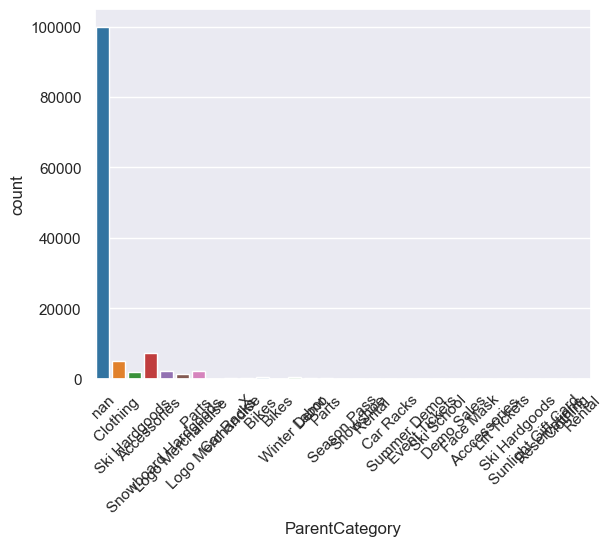

In [12]:
sns.countplot(x='ParentCategory',data=clean_products,palette='tab10')
plt.xticks(rotation=45)

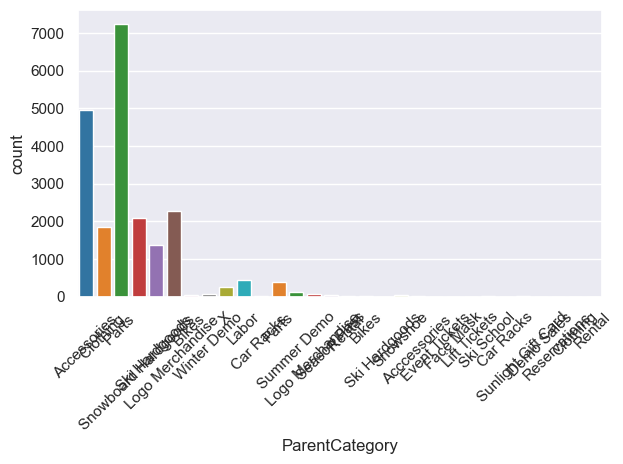

In [46]:
clean_products["ParentCategory"] = clean_products["ParentCategory"].replace(["nan", "", "N/A"], pd.NA)
df_products = clean_products.dropna(subset=["ParentCategory"])
# sns.countplot(x='ParentCategory',data=df_products,palette='tab10')

# Create the countplot
bar_plot = sns.countplot(x='ParentCategory', data=df_products, palette='tab10')

# Sort the bars
counts = df_products['ParentCategory'].value_counts()
bar_plot.set_xticklabels(counts.index.to_list())

# Rotate x-axis labels
plt.xticks(rotation=45)

# Zoom in (adjust limits as needed)
plt.tight_layout()

plt.show()

In [45]:
categories_list = pd.read_csv('../data/raw/category-list.csv')
inconsistent_categories = set(products['Category']).difference(categories_list)
print(len(inconsistent_categories))

270


lowercase

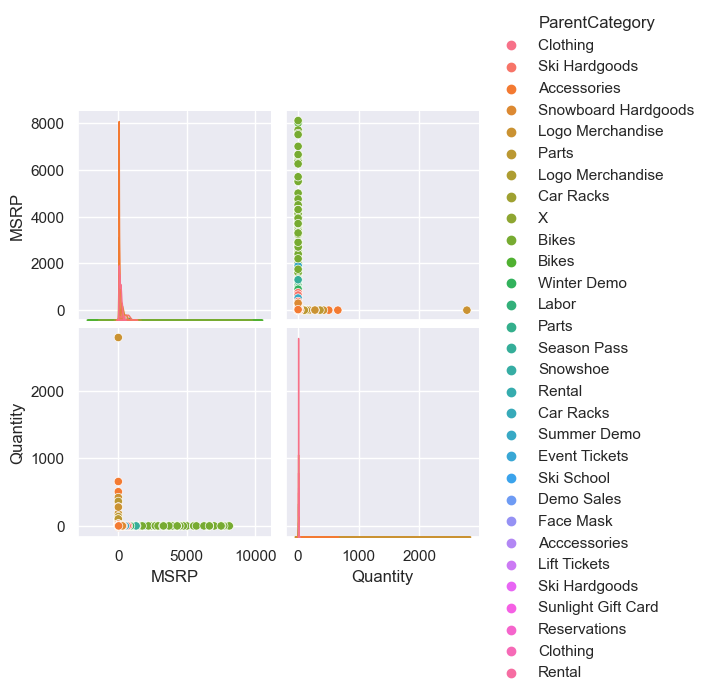

In [49]:
sns.pairplot(df_products, hue = 'ParentCategory')

In [50]:
df_products.to_csv('../data/processed/products.csv', index=False, encoding='utf-8')

# 1.7 Summary<a id='1.7_Summary'></a>

There are a number of missing category values for the products, which makes it hard to run reports and see which categories and types of products sell the best at the store. In order to update the categories to a new schema that will make reporting much more straightforward, it is necessary to view the pattern in the missing category data, as well as the accuracy in the category calssification. Are the products in the correct category? And can we fix it with automatic classification. Let's find out!